# 1. Problem statement - Sentiment Analysis

Need to perform Sentiment Analysis on reviews posted for Product on Amazon.Here we need to predict the Score with respect to the Review.

# 2.IMPORTING LIBRARIES AND DATASETS

In [1]:
#Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

#sckiti libraries
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


#Advanced NLP libraries
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\esvit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data=pd.read_csv(r'Reviews (1).csv')
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
#unique Product
len(data.ProductId.unique())

74258

In [4]:
#value count of Scores
data.Score.value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

In [5]:
data.shape

(568454, 10)

Glimpse on one Row

In [6]:

data['Summary'][2021]

'Our favorite breakfast choice'

In [7]:
data['Text'][2021]

'Bought a great waffle maker two years ago.  Tried many recipes for making waffles, nothing really pleased the family. Well, until I followed a recommendation to try Stonewall Waffles.  Believe me it is not like Bisquick as I thought it might be, it is so much better I was shocked.  And well now the family loves them and looks forward to Sunday waffles every couple weeks.  I even double up the ingredients so I can make extras which we cut into smaller sections and freeze them.  These can then be used for toster waffles and a quick breakfast.  Forget the Eggos even as frozen waffles these are great.<br /><br />What do I like best about them?  The waffles come out light and fluffy.  They are crisp and hold up well to being filled with strawberries, nuts or whatever toppings you may choose.  In no way do they feel heavy or soggy.  They are a snap to prepare, and take just 3 minutes in the waffle maker. Lastly the whole family loves them.  So despite the higher price it is well worth every

Resizing dataset so that Machine can handle

In [8]:
#Resizing data
df=data.sample(10000)


In [9]:
df.reset_index(inplace=True)

In [10]:
df=df.drop(columns=['index','Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator','Time','Summary'])

In [11]:
df.columns

Index(['Score', 'Text'], dtype='object')

In [12]:
df

,Score,Text
0,5,This Hickory Smoked flavor is my favorite of t...
1,4,I'm mostly a coffee drinker but I do try to dr...
2,5,Bought these to make gluten free eggrolls for ...
3,5,I highly recommend Newman's Own Organics Dog F...
4,5,"The ""GeniSoy"" Protein Shakes have always impre..."
...,...,...
9995,1,This stuff is terrible! It's not hot & spicy i...
9996,3,I bought these to see if Jamaica Blue Mountain...
9997,5,We buy these by the case for our dogs. They a...
9998,4,I am always skeptical about the claims of most...


In [13]:
#df['Text'].iloc[0]

In [14]:
df.Score.value_counts()

5    6335
4    1477
1     941
3     742
2     505
Name: Score, dtype: int64

In [15]:
df

,Score,Text
0,5,This Hickory Smoked flavor is my favorite of t...
1,4,I'm mostly a coffee drinker but I do try to dr...
2,5,Bought these to make gluten free eggrolls for ...
3,5,I highly recommend Newman's Own Organics Dog F...
4,5,"The ""GeniSoy"" Protein Shakes have always impre..."
...,...,...
9995,1,This stuff is terrible! It's not hot & spicy i...
9996,3,I bought these to see if Jamaica Blue Mountain...
9997,5,We buy these by the case for our dogs. They a...
9998,4,I am always skeptical about the claims of most...


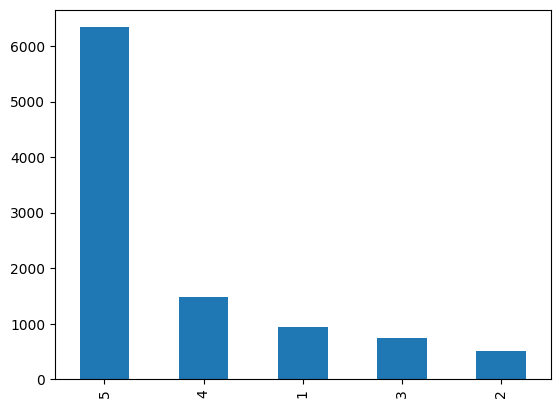

In [16]:
df.Score.value_counts().plot(kind='bar');

# 2.TEXT PREPROCESS

Text Pre-Processing is the step to clean data . Clean data is essential because we need to send vectors for important words predicting target hence words not so essential has to be cleaned.

In [17]:
df.head()

,Score,Text
0,5,This Hickory Smoked flavor is my favorite of t...
1,4,I'm mostly a coffee drinker but I do try to dr...
2,5,Bought these to make gluten free eggrolls for ...
3,5,I highly recommend Newman's Own Organics Dog F...
4,5,"The ""GeniSoy"" Protein Shakes have always impre..."


# 2.1 Lowercase

Lowercasing is required to put all the wors in lowercase and it is useful to manage the case senstivity of a word in python.

Example - in python 'Machine' and 'machine' are different words however in english they are same

In [22]:
text='I am doing a PROJECT TOdaY'
text.lower()

'i am doing a project today'

In [23]:
#lowercase
df['Text']=df['Text'].str.lower()

In [24]:
df.head()

,Score,Text
0,5,this hickory smoked flavor is my favorite of t...
1,4,i'm mostly a coffee drinker but i do try to dr...
2,5,bought these to make gluten free eggrolls for ...
3,5,i highly recommend newman's own organics dog f...
4,5,"the ""genisoy"" protein shakes have always impre..."


# 2.2 Punctuation Removal

Punctuation removal is nessecary because they do not contribute in prediction of variable

In [25]:
#punctuation removal
import string
char=string.punctuation

In [26]:
char

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
def pun_rem(text):
    for i in char:
        text=text.replace(i,'')
    return text

In [28]:
df['Text']=df['Text'].apply(pun_rem)

In [29]:
#checking some random row 
df['Text'][9187]

'i need to eat 1 or 2 protein bars every day as a post bariatric surgery patient to ensure that i get enough protein every day this doublechocolate special k protein bar 10g protein 180 cal is my very favorite protein bar since it tastes more like a chocolate candy bar with crunch ive been eating 45 per week for over a year and i still dont get tired of them there may be bars with more protein or ones with more fiber but none with better taste in my opinion buy one box and youll be hooked'

In [30]:
#checking function on a random text
text4="Hey!!there!!, How's it going ? Have you seen +samantha ? I think she ,must{ be} out * of the $city .Right ? ?,also , let me add a stopwrods a , it, he ,she,had"
pun_rem(text4)

'Heythere Hows it going  Have you seen samantha  I think she must be out  of the city Right  also  let me add a stopwrods a  it he shehad'

## 2.3 HTML TAGS

Has to be removed because no contribution towards prediction

In [31]:
#REGEX is very much used in NLP 

import re
def removal_html(text):
    pattern = re.compile('<.*?>')#for html tags removal
    return pattern.sub(r'',text) #substituing tag with ''

In [32]:
df['Text']=df['Text'].apply(removal_html)

In [33]:
#checking on random text
text = '<b>Hello</b> <i>world!</i> <a href="https://www.example.com">Click here</a> to learn more about HTML.'
removal_html(text)

'Hello world! Click here to learn more about HTML.'

# 2.4 REMOVE URL AND WWW

In [34]:
# remove URL
def rem_url(text):
    pattern=re.compile('https?://\S+|www.\S+')
    
    return pattern.sub(r'',text)

In [35]:
df['Text']=df['Text'].apply(rem_url)

In [36]:
#checking on random string
text1 = "Check out our latest product at http://url.com/bla1/blah1/ and at  www.yahoo.com"
rem_url(text1)


'Check out our latest product at  and at  '

# 2.5 Stop word removal

In [37]:
def stp_rem(text):
    token=text.split()
    tokens=[x for x in token if x not in stopwords.words('english')]
    feat=' '.join(tokens)
    return feat

In [38]:
print(stopwords.words('english'))
#note all stopwords are in lower case

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [39]:
#checking on a random text
text2='Hi Yesterday I watched two movies Annabella and o.u.a.t.a and day before yesterday i watched Life of pie'
stp_rem(text2)

'Hi Yesterday I watched two movies Annabella o.u.a.t.a day yesterday watched Life pie'

In [40]:
df['Text']=df['Text'].apply(stp_rem)

In [41]:
df['Text'][14]

'always wanted like greent tea never able sister gave cup tea house completely taste smooth mild sweetness jasmine husband successfully quit coffee thanks tea'

# 2.6 LEMMITIZATION

In [42]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\esvit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [43]:
wl=WordNetLemmatizer()

In [44]:
def lem(text):
    words=word_tokenize(text)
    lemm=[wl.lemmatize(i) for i in words]#since lemmitizer work on each word hence we need to have list of it
    return ' '.join(lemm)

In [45]:
df['Text'] = df['Text'].apply(lem)

In [46]:
df['Text']

0       hickory smoked flavor favorite primal strip lo...
1       im mostly coffee drinker try drink cup green t...
2       bought make gluten free eggrolls granddaughter...
3       highly recommend newman organic dog food natur...
4       genisoy protein shake always impressed creamy ...
                              ...                        
9995    stuff terrible hot spicy way unless count coat...
9996    bought see jamaica blue mountain life reputati...
9997    buy case dog healthy treat dog love somewhat s...
9998    always skeptical claim product however noticed...
9999    cat jd need get pill everyday much easier give...
Name: Text, Length: 10000, dtype: object

# 4. Text Vectorisation

In [47]:
x=df['Text']
y=df['Score']


In [48]:
x

0       hickory smoked flavor favorite primal strip lo...
1       im mostly coffee drinker try drink cup green t...
2       bought make gluten free eggrolls granddaughter...
3       highly recommend newman organic dog food natur...
4       genisoy protein shake always impressed creamy ...
                              ...                        
9995    stuff terrible hot spicy way unless count coat...
9996    bought see jamaica blue mountain life reputati...
9997    buy case dog healthy treat dog love somewhat s...
9998    always skeptical claim product however noticed...
9999    cat jd need get pill everyday much easier give...
Name: Text, Length: 10000, dtype: object

In [49]:
y

0       5
1       4
2       5
3       5
4       5
       ..
9995    1
9996    3
9997    5
9998    4
9999    5
Name: Score, Length: 10000, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,y_test.shape

((8000,), (2000,))

# 4.1 BOW

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(1,1))

In [52]:
x_train_bow=cv.fit_transform(x_train)
x_test_bow=cv.transform(x_test)
x_train_bow

<8000x21734 sparse matrix of type '<class 'numpy.int64'>'
	with 274735 stored elements in Compressed Sparse Row format>

In [53]:
x_train_bow.shape

(8000, 21734)

trying to find the documents and its vector

In [80]:
lis=list(cv.vocabulary_.items())
lis
for i in lis:
    if i[1]==7391:
        print(i)
        break

('experimented', 7391)


Found that order of x_train_bow is different from x_train

# 4.2 N-GRAM

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
bigm=CountVectorizer(ngram_range=(2,2))

In [66]:
x_train_bgm = bigm.fit_transform(x_train)
x_test_bgm=bigm.transform(x_test)
x_train_bgm.shape

(8000, 208847)

In [67]:
len(bigm.vocabulary_)

208847

In [68]:
#bigm.vocabulary_

# 4.3  Tri gram

In [69]:
trgm=CountVectorizer(ngram_range=(3,3))
x_train_trgm = trgm.fit_transform(x_train)
x_test_trgm=trgm.transform(x_test)

In [70]:
x_train_trgm.shape

(8000, 294898)

# 4.4 TF-IDF

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()

In [72]:
x_train_tf = tf.fit_transform(x_train)
x_test_tf =tf.transform(x_test)
x_train_tf.shape


(8000, 21734)

In [73]:
#tf.vocabulary_

# 5 . Modeling

# ********* BASE MODELS***************

# 5.1  Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression


In [104]:
lg=LogisticRegression(multi_class='multinomial')

In [105]:
model_bow = lg.fit(x_train_bow,y_train)
predict_bow=model_bow.predict(x_test_bow)
accuracy_score(y_test,predict_bow)

0.6645

In [106]:
model_bgm = lg.fit(x_train_bgm,y_train)
predict_bgm=model_bgm.predict(x_test_bgm)
accuracy_score(y_test,predict_bgm)

0.6375

In [107]:
model_tgm=lg.fit(x_train_trgm,y_train)
predict_tgm=model_tgm.predict(x_test_trgm)
accuracy_score(y_test,predict_tgm)

0.627

In [108]:
model_tf=lg.fit(x_train_tf,y_train)
predict_tf=model_tf.predict(x_test_tf)
accuracy_score(y_test,predict_tf)

0.674

In [109]:
#f=pd.DataFrame({'test':y_test,'predict':predict_tf})
#f.sample(10)


In [110]:
print(np.mean(cross_val_score(lg,x_train_bow,y_train,cv=5,scoring='accuracy')))
print(np.mean(cross_val_score(lg,x_train_bgm,y_train,cv=5,scoring='accuracy')))
print(np.mean(cross_val_score(lg,x_train_trgm,y_train,cv=5,scoring='accuracy')))
print(np.mean(cross_val_score(lg,x_train_tf,y_train,cv=5,scoring='accuracy')))

0.66825
0.657875
0.6493749999999999
0.676125


FROM THE ABOVE CROSS VAL SCORE WE FIND THAT TF MODEL IS LESS OVERFITTED .Hence, we will find accuracy parameter of it

In [113]:
#confusion matrix for BGM since it is showing the highest accuracy in LGR model
confusion_matrix(y_test,predict_tf)

array([[  78,    3,    0,    8,  118],
       [  14,    2,    5,   10,   72],
       [   8,    1,   10,   31,   98],
       [   3,    2,    5,   60,  242],
       [   4,    0,    2,   26, 1198]], dtype=int64)

In [114]:
print(classification_report(y_test,predict_tf))

              precision    recall  f1-score   support

           1       0.73      0.38      0.50       207
           2       0.25      0.02      0.04       103
           3       0.45      0.07      0.12       148
           4       0.44      0.19      0.27       312
           5       0.69      0.97      0.81      1230

    accuracy                           0.67      2000
   macro avg       0.51      0.33      0.35      2000
weighted avg       0.62      0.67      0.60      2000



# 5 .2MNB

In [84]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()

In [85]:
model_bow = mnb.fit(x_train_bow,y_train)
predict_bow= model_bow.predict(x_test_bow)
accuracy_score(y_test,predict_bow)

0.648

In [86]:
#predict_bow
#check overfitting of model

In [87]:
model_bgm = mnb.fit(x_train_bgm,y_train)
predict_bgm= model_bgm.predict(x_test_bgm)
accuracy_score(y_test,predict_bgm)

0.6405

In [88]:
model_tgm = mnb.fit(x_train_trgm,y_train)
predict_tgm= model_tgm.predict(x_test_trgm)
accuracy_score(y_test,predict_tgm)

0.623

In [89]:
model_tf = mnb.fit(x_train_tf,y_train)
predict_tf= model_tf.predict(x_test_tf)
accuracy_score(y_test,predict_tf)

0.615

In [90]:
print(np.mean(cross_val_score(mnb,x_train_bow,y_train,cv=5,scoring='accuracy')))
print(np.mean(cross_val_score(mnb,x_train_bgm,y_train,cv=5,scoring='accuracy')))
print(np.mean(cross_val_score(mnb,x_train_trgm,y_train,cv=5,scoring='accuracy')))
print(np.mean(cross_val_score(mnb,x_train_tf,y_train,cv=5,scoring='accuracy')))

0.6525000000000001
0.507
0.13774999999999998
0.638


In [101]:
#predict_tf

confusion_matrix(y_test,predict_bow)
#predicted ---
#actual| 

array([[  34,    0,    0,    0,  173],
       [   1,    0,    0,    0,  102],
       [   3,    0,    2,    0,  143],
       [   1,    0,    0,    5,  306],
       [   1,    0,    0,    0, 1229]], dtype=int64)

In [102]:
print(classification_report(y_test,predict_bow))

              precision    recall  f1-score   support

           1       0.85      0.16      0.28       207
           2       0.00      0.00      0.00       103
           3       1.00      0.01      0.03       148
           4       1.00      0.02      0.03       312
           5       0.63      1.00      0.77      1230

    accuracy                           0.64      2000
   macro avg       0.70      0.24      0.22      2000
weighted avg       0.70      0.64      0.51      2000



# 5.3 SVC

In [94]:
from sklearn.svm import SVC
svc=SVC()

In [95]:
model_bow=svc.fit(x_train_bow,y_train)
predict_bow=svc.predict(x_test_bow)
accuracy_score(y_test,predict_bow)

0.635

In [96]:
model_bgm=svc.fit(x_train_bgm,y_train)
predict_bgm=svc.predict(x_test_bgm)
accuracy_score(y_test,predict_bgm)

0.621

In [97]:
model_tgm=svc.fit(x_train_trgm,y_train)
predict_tgm=svc.predict(x_test_trgm)
accuracy_score(y_test,predict_tgm)

0.6205

In [163]:
model_tf=svc.fit(x_train_tf,y_train)
predict_tf=svc.predict(x_test_tf)
accuracy_score(y_test,predict_tf)

0.6485

In [99]:
confusion_matrix(predict_tf,y_test)

array([[  46,    4,    3,    1,    0],
       [   0,    1,    0,    0,    0],
       [   0,    1,    6,    1,    0],
       [   0,    0,    5,   16,    2],
       [ 161,   97,  134,  294, 1228]], dtype=int64)

In [100]:
print(classification_report(predict_tf,y_test))

              precision    recall  f1-score   support

           1       0.22      0.85      0.35        54
           2       0.01      1.00      0.02         1
           3       0.04      0.75      0.08         8
           4       0.05      0.70      0.10        23
           5       1.00      0.64      0.78      1914

    accuracy                           0.65      2000
   macro avg       0.26      0.79      0.27      2000
weighted avg       0.96      0.65      0.76      2000



In [115]:
np.mean(cross_val_score(svc,x_train_tf,y_train,cv=10,scoring='accuracy'))

0.6617499999999998

In [121]:
np.mean(cross_val_score(svc,x_train_bow,y_train,cv=10,scoring='accuracy'))

0.6544999999999999

# Linear SVC


In [123]:
from sklearn.svm import LinearSVC
lsvc=LinearSVC()


In [164]:
model_bow=lsvc.fit(x_train_bow,y_train)
predict_bow=lsvc.predict(x_test_bow)
accuracy_score(y_test,predict_bow)

0.6365

In [165]:
model_bgm=lsvc.fit(x_train_bgm,y_train)
predict_bgm=lsvc.predict(x_test_bgm)
accuracy_score(y_test,predict_bgm)

0.6385

In [166]:
model_tgm=lsvc.fit(x_train_trgm,y_train)
predict_tgm=lsvc.predict(x_test_trgm)
accuracy_score(y_test,predict_tgm)

0.6265

In [124]:
model_tf=lsvc.fit(x_train_tf,y_train)
predict_tf=lsvc.predict(x_test_tf)
accuracy_score(y_test,predict_tf)

0.6735

In [125]:
print(classification_report(y_test,predict_tf))

              precision    recall  f1-score   support

           1       0.66      0.48      0.56       207
           2       0.41      0.14      0.20       103
           3       0.34      0.22      0.27       148
           4       0.37      0.25      0.30       312
           5       0.75      0.91      0.82      1230

    accuracy                           0.67      2000
   macro avg       0.51      0.40      0.43      2000
weighted avg       0.63      0.67      0.64      2000



In [126]:
confusion_matrix(predict_tf,y_test)

array([[ 100,   19,   11,    7,   14],
       [  10,   14,    3,    6,    1],
       [  12,   14,   33,   19,   19],
       [  12,   14,   34,   78,   74],
       [  73,   42,   67,  202, 1122]], dtype=int64)

In [167]:
np.mean(cross_val_score(lsvc,x_train_tf,y_train,cv=5,scoring='accuracy'))

0.687125

# SGD

In [173]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()


In [174]:
model_bow=sgd.fit(x_train_bow,y_train)
predict_bow=sgd.predict(x_test_bow)
accuracy_score(y_test,predict_bow)

0.6355

In [175]:
model_bgm=sgd.fit(x_train_bgm,y_train)
predict_bgm=sgd.predict(x_test_bgm)
accuracy_score(y_test,predict_bgm)

0.6355

In [176]:
model_tgm=sgd.fit(x_train_trgm,y_train)
predict_tgm=sgd.predict(x_test_trgm)
accuracy_score(y_test,predict_tgm)

0.626

In [182]:
model_tf=sgd.fit(x_train_tf,y_train)
predict_tf=sgd.predict(x_test_tf)
accuracy_score(y_test,predict_sgd)

0.6835

In [185]:
np.mean(cross_val_score(sgd,x_train_tf,y_train,cv=5,scoring='accuracy'))

0.692625

In [187]:
confusion_matrix(y_test,predict_tf)

array([[ 111,    6,    5,   10,   75],
       [  22,   10,    8,   13,   50],
       [  17,    2,   23,   33,   73],
       [  11,    6,   11,   59,  225],
       [  15,    1,    5,   41, 1168]], dtype=int64)

In [188]:
print(classification_report(y_test,predict_sgd))

              precision    recall  f1-score   support

           1       0.65      0.53      0.58       207
           2       0.38      0.09      0.14       103
           3       0.43      0.17      0.24       148
           4       0.37      0.19      0.25       312
           5       0.73      0.95      0.83      1230

    accuracy                           0.68      2000
   macro avg       0.51      0.38      0.41      2000
weighted avg       0.63      0.68      0.63      2000



Among all the baseline models SGD gives the best performance of approx 67-68% accuracy

# HYPERPARAMETER TUNING OF BASE MODEL

In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.

In [189]:
from sklearn.model_selection import RandomizedSearchCV

In [190]:
estimator =sgd
parameters={'loss':['hinge','log_loss','modified_huber','squared_hinge','epsilon_insensitive','perceptron'],
           'penalty':['l1','elasticnet'],
           'class_weight':['weight','balanced']}

In [191]:
rd=RandomizedSearchCV(estimator=estimator,param_distributions=parameters)
clf=rd.fit(x_train_tf,y_train)

In [192]:
clf.best_estimator_

SGDClassifier(class_weight='balanced', loss='log_loss', penalty='elasticnet')

In [193]:
clf.best_params_

{'penalty': 'elasticnet', 'loss': 'log_loss', 'class_weight': 'balanced'}

In [194]:
clf.best_score_

0.6797500000000001

# ENSEMBLE TECHNIQUES

# VOTING CLASSIFIER

In [221]:
estimators=[('lg',lg),('rf',rf),('mnb',mnb),('lsvc',lsvc),('svc',svc),('sgd',sgd)]

In [222]:
#estimators[0][0]

In [223]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=estimators,voting='hard')


In [224]:
model_tf=vc.fit(x_train_tf,y_train)
predict_tf=vc.predict(x_test_tf)
accuracy_score(y_test,predict_tf)

0.6745

In [225]:
model_bow=vc.fit(x_train_bow,y_train)
predict_bow=vc.predict(x_test_bow)
accuracy_score(y_test,predict_bow)

0.6685

In [226]:
model_bgm=vc.fit(x_train_bgm,y_train)
predict_bgm=vc.predict(x_test_bgm)
accuracy_score(y_test,predict_bgm)

0.6425

In [228]:
model_tgm=vc.fit(x_train_trgm,y_train)
predict_tgm=vc.predict(x_test_trgm)
accuracy_score(y_test,predict_tgm)

0.6265

In [229]:
confusion_matrix(y_test,predict_tf)

array([[  72,    3,    0,    5,  127],
       [  12,    4,    3,    6,   78],
       [   7,    1,   13,   22,  105],
       [   3,    2,    5,   53,  249],
       [   4,    0,    2,   17, 1207]], dtype=int64)

In [232]:
print(classification_report(y_test,predict_tf))

              precision    recall  f1-score   support

           1       0.73      0.35      0.47       207
           2       0.40      0.04      0.07       103
           3       0.57      0.09      0.15       148
           4       0.51      0.17      0.26       312
           5       0.68      0.98      0.81      1230

    accuracy                           0.67      2000
   macro avg       0.58      0.33      0.35      2000
weighted avg       0.64      0.67      0.60      2000



In [231]:
f'''x=cross_val_score(vc,x_train_tf,y_train,cv=10,scoring='accuracy')
print(np.mean(x))'''

"x=cross_val_score(vc,x_train_tf,y_train,cv=10,scoring='accuracy')\nprint(np.mean(x))"

# BAGGING

# RANDOM FOREST

In [233]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [234]:
model_bow=rf.fit(x_train_bow,y_train)
predict_bow = rf.predict(x_test_bow)
accuracy_score(y_test,predict_bow)

0.642

In [235]:
model_bgm=rf.fit(x_train_bgm,y_train)
predict_bgm = rf.predict(x_test_bgm)
accuracy_score(y_test,predict_bgm)

0.6425

In [236]:
model_tgm=rf.fit(x_train_trgm,y_train)
predict_tgm = rf.predict(x_test_trgm)
accuracy_score(y_test,predict_tgm)

0.6305

In [237]:
model_tf=rf.fit(x_train_tf,y_train)
predict_tf = rf.predict(x_test_tf)
accuracy_score(y_test,predict_tf)

0.636

In [238]:
confusion_matrix(y_test,predict_bow)

array([[  34,    0,    1,    0,  172],
       [   1,    2,    0,    0,  100],
       [   2,    0,    7,    1,  138],
       [   1,    0,    1,   12,  298],
       [   0,    0,    0,    1, 1229]], dtype=int64)

In [239]:
print(classification_report(y_test,predict_bow))

              precision    recall  f1-score   support

           1       0.89      0.16      0.28       207
           2       1.00      0.02      0.04       103
           3       0.78      0.05      0.09       148
           4       0.86      0.04      0.07       312
           5       0.63      1.00      0.78      1230

    accuracy                           0.64      2000
   macro avg       0.83      0.25      0.25      2000
weighted avg       0.73      0.64      0.53      2000



# BAGGIGNG CLASFIFERS

In [240]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(base_estimator=sgd,
                    n_estimators=50,
                    max_samples=0.3,
                    random_state=0)

In [241]:
model_bow=bg.fit(x_train_bow,y_train)
predict_bow = bg.predict(x_test_bow)
accuracy_score(y_test,predict_bow)

0.667

In [242]:
model_bgm=bg.fit(x_train_bgm,y_train)
predict_bgm = bg.predict(x_test_bgm)
accuracy_score(y_test,predict_bgm)

0.618

In [243]:
model_tgm=bg.fit(x_train_trgm,y_train)
predict_tgm = bg.predict(x_test_trgm)
accuracy_score(y_test,predict_tgm)

0.6155

In [244]:
model_tf = bg.fit(x_train_tf,y_train)
predict_tf = bg.predict(x_test_tf)
accuracy_score(y_test,predict_tf)

0.6605

In [245]:
confusion_matrix(y_test,predict_bg)

array([[  72,    2,    1,    7,  125],
       [  14,    1,    4,   12,   72],
       [   8,    1,    7,   27,  105],
       [   4,    1,    3,   55,  249],
       [   3,    0,    2,   15, 1210]], dtype=int64)

In [246]:
print(classification_report(y_test,predict_bg))

              precision    recall  f1-score   support

           1       0.71      0.35      0.47       207
           2       0.20      0.01      0.02       103
           3       0.41      0.05      0.08       148
           4       0.47      0.18      0.26       312
           5       0.69      0.98      0.81      1230

    accuracy                           0.67      2000
   macro avg       0.50      0.31      0.33      2000
weighted avg       0.61      0.67      0.59      2000



# BOOSTING

# Gradient Boost

In [248]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()


In [249]:
model_bow=gb.fit(x_train_bow,y_train)
predict_bow = gb.predict(x_test_bow)
accuracy_score(y_test,predict_bow)

0.6505

In [250]:
model_bgm=gb.fit(x_train_bgm,y_train)
predict_bgm = gb.predict(x_test_bgm)
accuracy_score(y_test,predict_bgm)

0.6285

In [251]:
model_tgm=gb.fit(x_train_trgm,y_train)
predict_tgm = gb.predict(x_test_trgm)
accuracy_score(y_test,predict_tgm)

0.617

In [252]:
model_tf = gb.fit(x_train_tf,y_train)
predict_tf = gb.predict(x_test_tf)
accuracy_score(y_test,predict_gb)


0.6585

In [253]:
confusion_matrix(y_test,predict_tf)

array([[  52,    6,    2,    6,  141],
       [   4,    3,    5,    7,   84],
       [   6,    2,    9,   15,  116],
       [   1,    3,    2,   36,  270],
       [   2,    1,    3,    9, 1215]], dtype=int64)

In [254]:
print(classification_report(y_test,predict_gb))

              precision    recall  f1-score   support

           1       0.77      0.24      0.36       207
           2       0.12      0.02      0.03       103
           3       0.52      0.07      0.13       148
           4       0.53      0.12      0.20       312
           5       0.67      0.99      0.80      1230

    accuracy                           0.66      2000
   macro avg       0.52      0.29      0.30      2000
weighted avg       0.62      0.66      0.57      2000



# XGBOOST

In [255]:
import xgboost

In [256]:
f'''from xgboost import XGBClassifier
#xgb=XGBClassifier(objective='gblinear')
model_xgb=xgb.fit(x_train_tf,y_train)
predict_xgb=xgb.predict(x_test_tf)
accuracy_score(y_test,predict_xgb)'''

"from xgboost import XGBClassifier\n#xgb=XGBClassifier(objective='gblinear')\nmodel_xgb=xgb.fit(x_train_tf,y_train)\npredict_xgb=xgb.predict(x_test_tf)\naccuracy_score(y_test,predict_xgb)"

# ADABOOST

In [257]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier()


In [258]:
model_bow=adb.fit(x_train_bow,y_train)
predict_bow = adb.predict(x_test_bow)
accuracy_score(y_test,predict_bow)

0.6545

In [259]:
model_bgm=adb.fit(x_train_bgm,y_train)
predict_bgm = adb.predict(x_test_bgm)
accuracy_score(y_test,predict_bgm)

0.629

In [260]:
model_tgm=adb.fit(x_train_trgm,y_train)
predict_tgm = adb.predict(x_test_trgm)
accuracy_score(y_test,predict_tgm)

0.617

In [261]:
model_tf = adb.fit(x_train_tf,y_train)
predict_tf = adb.predict(x_test_tf)
accuracy_score(y_test,predict_adb)

0.645

In [262]:
confusion_matrix(y_test,predict_adb)

array([[  59,    7,    8,    3,  130],
       [  13,   16,    6,    0,   68],
       [  13,    6,   13,    4,  112],
       [   9,    2,    9,   23,  269],
       [  24,    4,    9,   14, 1179]], dtype=int64)

In [263]:
print(classification_report(y_test,predict_adb))

              precision    recall  f1-score   support

           1       0.50      0.29      0.36       207
           2       0.46      0.16      0.23       103
           3       0.29      0.09      0.13       148
           4       0.52      0.07      0.13       312
           5       0.67      0.96      0.79      1230

    accuracy                           0.65      2000
   macro avg       0.49      0.31      0.33      2000
weighted avg       0.59      0.65      0.56      2000



# LIGHT GBM

In [264]:
import lightgbm 
from lightgbm import LGBMClassifier
lgb=LGBMClassifier()

In [265]:
model_bow=lgb.fit(x_train_bow,y_train)
predict_bow = lgb.predict(x_test_bow)
accuracy_score(y_test,predict_bow)

0.6535

In [266]:
model_bgm=lgb.fit(x_train_bgm,y_train)
predict_bgm = lgb.predict(x_test_bgm)
accuracy_score(y_test,predict_bgm)

0.6285

In [267]:
model_tgm=lgb.fit(x_train_trgm,y_train)
predict_tgm = lgb.predict(x_test_trgm)
accuracy_score(y_test,predict_tgm)

0.617

In [268]:
model_tf = lgb.fit(x_train_tf,y_train)
predict_tf = lgb.predict(x_test_tf)
accuracy_score(y_test,predict_lgb)

0.6855

In [271]:
np.mean(cross_val_score(lgb,x_train_tf,y_train,cv=5,scoring='accuracy'))

0.6832499999999999

In [273]:
confusion_matrix(y_test,predict_tf)

array([[  86,   11,   12,   11,   87],
       [  21,   10,    8,   13,   51],
       [  14,    4,   26,   33,   71],
       [   5,    2,    9,   83,  213],
       [  14,    2,    7,   41, 1166]], dtype=int64)

In [274]:
print(classification_report(y_test,predict_tf))

              precision    recall  f1-score   support

           1       0.61      0.42      0.50       207
           2       0.34      0.10      0.15       103
           3       0.42      0.18      0.25       148
           4       0.46      0.27      0.34       312
           5       0.73      0.95      0.83      1230

    accuracy                           0.69      2000
   macro avg       0.51      0.38      0.41      2000
weighted avg       0.64      0.69      0.64      2000



# BEST MODEL 

* LIGHT GBM WITH 68.55% ACCURACY
* SGD WITH 68.32% ACCURACY

# NOTES

* Originl datasets is having more than 5.5 lakhs rows due to the shortcoming of local system it has been downsized
* It has been observed that more the data more the accuracy for sentiment prediction
* SVC algo took so much of time dealing with the traing
* XGBOOST require labelling str from 0 hence not done but done in another notebook where positive is marked as 1 and negative as 0
* This is the traditional way of dealing with sentiment analysis better modelling is done by fine tuning a pre-trained transformer model like BERT,ROBERTA etc


BEST MODELS ARE-

* LIGHT GBM WITH 68.55% ACCURACY
* SGD WITH 68.32% ACCURACY